In [11]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [12]:
class DepthMap: 
    def __init__(self,showImages): 
        # Load Images 
        self.imgLeft = cv.imread('im0.png',cv.IMREAD_GRAYSCALE) 
        self.imgRight = cv.imread('im1.png',cv.IMREAD_GRAYSCALE) 

        if showImages: 
            plt.figure() 
            plt.subplot(121)
            plt.imshow(self.imgLeft)
            plt.subplot(122)
            plt.imshow(self.imgRight)
            plt.show() 

    def computeDepthMapBM(self):
        nDispFactor = 12 # adjust this 
        stereo = cv.StereoBM.create(numDisparities=16*nDispFactor, blockSize=21)
        disparity = stereo.compute(self.imgLeft,self.imgRight)
        plt.imshow(disparity,'gray')
        plt.show()

    def computeDepthMapSGBM(self): 
        window_size = 7
        min_disp = 16
        nDispFactor = 14 # adjust this (14 is good)
        num_disp = 16*nDispFactor-min_disp

        stereo = cv.StereoSGBM_create(minDisparity=min_disp,
                                    numDisparities=num_disp,
                                    blockSize=window_size,
                                    P1=8*3*window_size**2,
                                    P2=32*3*window_size**2,
                                    disp12MaxDiff=1,
                                    uniquenessRatio=15,
                                    speckleWindowSize=0,
                                    speckleRange=2,
                                    preFilterCap=63,
                                    mode=cv.STEREO_SGBM_MODE_SGBM_3WAY)

        # Compute disparity map
        disparity = stereo.compute(self.imgLeft,self.imgRight).astype(np.float32) / 16.0
       
        
        # Display the disparity map
        plt.imshow(disparity, 'gray')
        plt.colorbar()
        plt.show()

In [13]:
def demoViewPics():
    # See pictures 
    dp = DepthMap(showImages=True) 

In [14]:
def demoStereoBM(): 
    dp = DepthMap(showImages=False)
    dp.computeDepthMapBM()


In [15]:
def demoStereoSGBM(): 
    dp = DepthMap(showImages=False)
    dp.computeDepthMapSGBM()


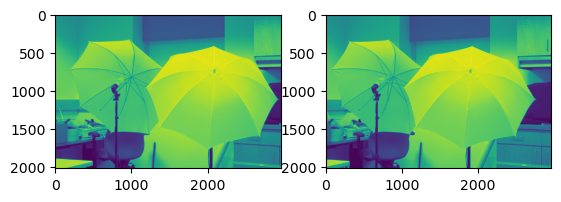

In [16]:
if __name__ == '__main__': 
    demoViewPics()
    # demoStereoBM()
    # demoStereoSGBM() 

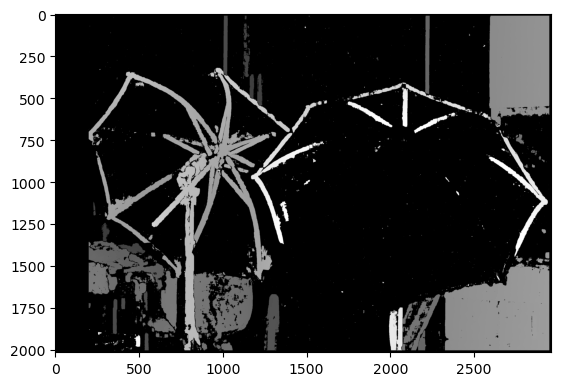

In [17]:
if __name__ == '__main__': 
    # demoViewPics()
    demoStereoBM()
    # demoStereoSGBM() 

[[ 15.      15.      15.     ... 109.875  109.8125 109.8125]
 [ 15.      15.      15.     ... 109.9375 109.8125 109.8125]
 [ 15.      15.      15.     ... 109.9375 109.9375 109.8125]
 ...
 [ 15.      15.      15.     ... 117.0625 117.0625 117.0625]
 [ 15.      15.      15.     ... 117.     117.0625 117.0625]
 [ 15.      15.      15.     ... 117.     117.     117.    ]]


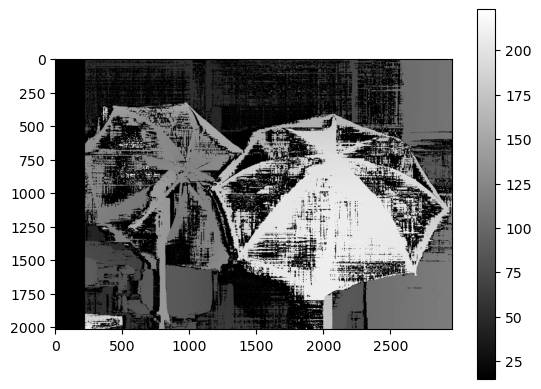

In [18]:
if __name__ == '__main__': 
    # demoViewPics()
    # demoStereoBM()
    disp = demoStereoSGBM() 

## Further trial

In [19]:
# import numpy as np
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# 
# # Generate synthetic data
# num_samples = 1000
# image_height, image_width = 128, 128
# num_channels = 3  # Assuming RGB images for simplicity
# 
# # Generate random stereo image pairs
# stereo_images = np.random.rand(num_samples, image_height, image_width, num_channels)
# 
# # Generate corresponding ground truth depth maps
# depth_maps = np.random.uniform(low=0.1, high=1.0, size=(num_samples, image_height, image_width, 1))
# 
# # Split the data into training and validation sets
# train_images, val_images, train_depth, val_depth = train_test_split(
#     stereo_images, depth_maps, test_size=0.2, random_state=42
# )
# 
# # Define a simple CNN model for depth estimation
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(1)  # Output layer predicting depth
# ])
# 
# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')
# 
# # Train the model
# model.fit(train_images, train_depth, epochs=10, validation_data=(val_images, val_depth))
# 
# # Once trained, you can use the model to predict depth maps for new stereo image pairs
# new_stereo_image_pair = np.random.rand(1, image_height, image_width, num_channels)
# predicted_depth = model.predict(new_stereo_image_pair)
# print(predicted_depth)